# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Kapan waktu paling sibuk dalam sehari untuk penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
day_df = pd.read_csv("/content/drive/MyDrive/KULIAH/DBS CODING CAMP (Machine Learning)/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv("/content/drive/MyDrive/KULIAH/DBS CODING CAMP (Machine Learning)/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


pada tabel day, ada kesalahan di tipe data dteday, yr, mnth harusnya datetime,

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pada tabel hour, ada kesalahan di tipe data dteday, yr, mnth harusnya datetime,

**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
datetime_columns = ["dteday", "yr", "mnth"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    datetime64[ns]
 4   mnth        731 non-null    datetime64[ns]
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](3), floa

In [ ]:
datetime_columns = ["dteday", "yr", "mnth"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  datetime64[ns]
 4   mnth        17379 non-null  datetime64[ns]
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore data day.csv

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,1970-01-01 00:00:00,1970-01-01 00:00:00.000000006,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,1970-01-01 00:00:00,1970-01-01 00:00:00.000000001,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,1970-01-01 00:00:00,1970-01-01 00:00:00.000000004,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000007,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000010,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000012,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,NaN,NaN,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Rata-rata jumlah peminjaman sepeda per hari (cnt) adalah 4.504 sepeda dengan standar deviasi 1.937.

Rata-rata cuaca (weathersit) adalah 1,39 dalam kisaran 1 dan 3, yang artinya cuaca 1 adalah Clear, Few clouds, Partly cloudy, Partly cloudy

In [ ]:
# Melihat statistik jumlah peminjaman berdasarkan kondisi cuaca
demografi_peminjaman = day_df.groupby(by="weathersit").agg({
    "cnt": ["count", "mean", "max", "min", "std"]
})

display(demografi_peminjaman)

cnt                                     
           count         mean   max  min          std
weathersit                                           
1            463  4876.786177  8714  431  1879.483989
2            247  4035.862348  8362  605  1809.109918
3             21  1803.285714  4639   22  1240.284449

Berdasarkan pivot table di atas, dapat diketahui bahwa peminjaman tertinggi terjadi pada cuaca 1 (Clear, Few Clouds, Partly Cloudy) dengan rata-rata 4876 sepeda per hari dan jumlah maksimal mencapai 8714 sepeda.

### Explore data hour.csv

In [ ]:
# Ringkasan statistik peminjaman berdasarkan jam
busy_hours = hour_df.groupby('hr').agg({
    'cnt': ['count', 'mean', 'max', 'min', 'std']
})
display(busy_hours)

cnt                                 
   count        mean  max min         std
hr                                       
0    726   53.898072  283   2   42.307910
1    724   33.375691  168   1   33.538727
2    715   22.869930  132   1   26.578642
3    697   11.727403   79   1   13.239190
4    697    6.352941   28   1    4.143818
5    717   19.889819   66   1   13.200765
6    725   76.044138  213   1   55.084348
7    727  212.064649  596   1  161.441936
8    727  359.011004  839   5  235.189285
9    727  219.309491  426  14   93.703458
10   727  173.668501  539   8  102.205413
11   727  208.143054  663  10  127.495536
12   728  253.315934  776   3  145.081134
13   729  253.661180  760  11  148.107657
14   729  240.949246  750  12  147.271574
15   729  251.233196  750   7  144.632541
16   730  311.983562  783  11  148.682618
17   730  461.452055  976  15  232.656611
18   728  425.510989  977  23  224.639304
19   728  311.523352  743  11  161.050359
20   728  226.030220  567  11  119.670164
21   728  172.314560  584   6   89.788893
22   728  131.335165  502   9   69.937782
23   728   87.831044  256   2   50.846889

Berdasarkan pivot table  di atas, puncak peminjaman sepeda terjadi pada jam 17:00 (5 sore) dengan rata-rata 461 sepeda dipinjam per jam

In [ ]:
# Gabungkan dataset berdasarkan 'dteday'
merged_df = pd.merge(
    left=hour_df,   # Dataset jam-jaman (lebih detail)
    right=day_df,   # Dataset harian (lebih ringkas)
    how="left",      # Gabungkan semua data dari hour_df
    on="dteday"      # Menggunakan tanggal sebagai key
)

# Tampilkan hasil
display(merged_df.head())

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,1970-01-01,1970-01-01 00:00:00.000000001,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,1970-01-01,1970-01-01 00:00:00.000000001,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,1970-01-01,1970-01-01 00:00:00.000000001,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,1970-01-01,1970-01-01 00:00:00.000000001,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,1970-01-01,1970-01-01 00:00:00.000000001,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


Penggabungan antara dataset hour_df dan day_df menggunakakn kolom "dteday" sebagai kuncinya

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

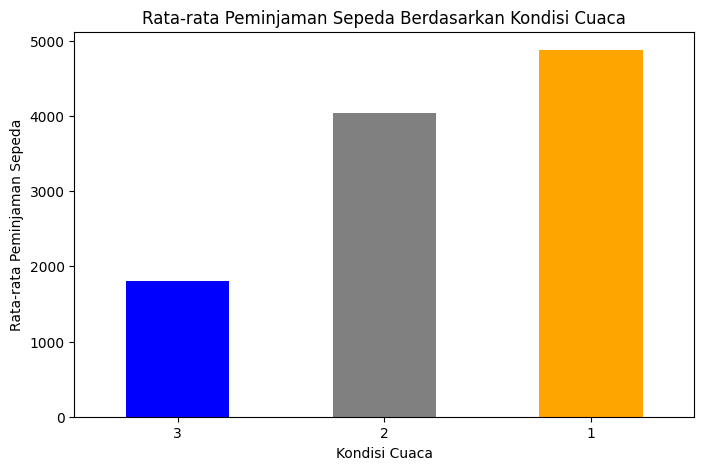

In [ ]:
# Visualisasi Bar Chart
plt.figure(figsize=(8,5))
avg_rentals = day_df.groupby('weathersit')['cnt'].mean().sort_values()
avg_rentals.plot(kind='bar', color=['blue', 'gray', 'orange', 'red'])
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(rotation=0)
plt.show()

# # Korelasi Cuaca dengan Jumlah Peminjaman
# weather_corr = day_df[['weathersit', 'cnt']].copy()
# weather_corr['weathersit'] = day_df['weathersit'].astype('category').cat.codes  # Encode kategori ke numerik
# correlation = weather_corr.corr()
# print("Korelasi antara kondisi cuaca dan jumlah peminjaman:")
# print(correlation['cnt']['weathersit'])

Berdasarkan visualisasi di atas, kita dapat melihat bahwa rata-rata peminjaman sepeda berdasarkan kondisi cuaca paling terbanyak adalah saat cuaca pada angka 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)

### Pertanyaan 2: Kapan waktu paling sibuk dalam sehari untuk penyewaan sepeda?

<ipython-input-28-41351e8a0785>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None, marker='o', color='b')


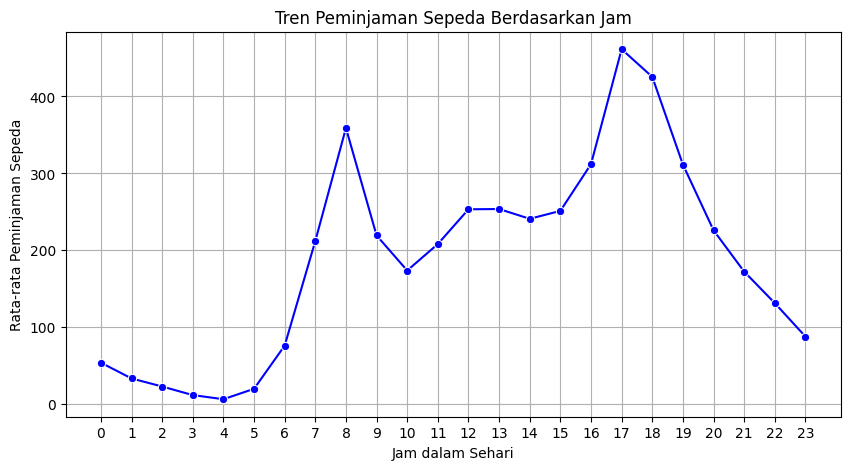

In [ ]:
# Visualisasi tren peminjaman sepeda per jam dalam sehari
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=hour_df, estimator='mean', ci=None, marker='o', color='b')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Tren Peminjaman Sepeda Berdasarkan Jam')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


Berdasarkan visualisasi di atas, kita dapat melihat bahwa waktu yang paling sibuk dalam sehari untuk peminjaman sepeda adalah pada saat di jam 17.00 (5 sore)

Selain itu, kita juga dapat melihat adanya penurunan penyimpanan sepeda yang cukup signifikan pada saat subuh.

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

Manual Grouping berdasarkan waktu

In [ ]:
def time_category(hr):
    if 6 <= hr <= 9:
        return "Morning (Rush Hour)"
    elif 10 <= hr <= 15:
        return "Afternoon (Normal Hours)"
    elif 16 <= hr <= 19:
        return "Evening (Rush Hour)"
    else:
        return "Night (Off-Peak Hours)"

hour_df["time_category"] = hour_df["hr"].apply(time_category)

Binning berdasarkan jumlah peminjaman

In [ ]:
def rental_category(cnt):
    if cnt <= 200:
        return "Low Usage"
    elif 201 <= cnt <= 500:
        return "Medium Usage"
    else:
        return "High Usage"

hour_df["rental_category"] = hour_df["cnt"].apply(rental_category)

In [ ]:
# Tampilkan hasil clustering
display(hour_df[["hr", "cnt", "time_category", "rental_category"]].head(10))

,hr,cnt,time_category,rental_category
0,0,16,Night (Off-Peak Hours),Low Usage
1,1,40,Night (Off-Peak Hours),Low Usage
2,2,32,Night (Off-Peak Hours),Low Usage
3,3,13,Night (Off-Peak Hours),Low Usage
4,4,1,Night (Off-Peak Hours),Low Usage
5,5,1,Night (Off-Peak Hours),Low Usage
6,6,2,Morning (Rush Hour),Low Usage
7,7,3,Morning (Rush Hour),Low Usage
8,8,8,Morning (Rush Hour),Low Usage
9,9,14,Morning (Rush Hour),Low Usage


Berdasarkan hasil clustering di atas menunjukkan bahwa peminjama sepeda tergolong rendang pada malam hinga pagi hari (00.00-09.00) karena mayoritas orang beristirahat

## Conclusion

- Berdasarkan analisis data yang telah diperoleh, kondisi cuaca sangat mempengaruhi jumlah peminjaman sepeda. Cuaca yang cerah hingga berawan di simbolkan dengan (1) memiliki rata-rata jumlah peminjaman tertinggi dibandingkan dengan kondisi cuaca yang lainnya. Analisis ini menunjukan bahwa pengguna cenderung menggunakan sepeda daat cuaca cerah dan mengurangi penggunaan sepeda daat cuaca buruk.
- Berdasarkan analisis peminjaman sepeda per jam, waktu yang paling sibuk untuk peminjaman sepeda terjadi pada pagi hari (jam 7-9) dan sore harii (jam 17-19). Peminjaman sepeda meningkat drastis pada jam-jam tersebut menunjukkan bahwa sebagian besar pengguna menggunakan sepeda sebagai alat transportasi mereka.